In [ ]:
import pandas as pd
import numpy as np
from numpy import mean,std
from numpy import hstack
from numpy import vstack
from numpy import asarray
import tensorflow as tf
import keras
import seaborn as sns
import rdkit
import pickle
import os
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import AllChem
from sklearn.utils import class_weight
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,train_test_split,StratifiedKFold,KFold,cross_val_score
from sklearn.feature_selection import RFE,VarianceThreshold,RFECV,SelectFromModel
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils import class_weight
from sklearn.metrics import  classification_report,plot_roc_curve,average_precision_score,precision_recall_curve,auc,roc_curve,r2_score,confusion_matrix,precision_score,recall_score, roc_auc_score ,accuracy_score,matthews_corrcoef,cohen_kappa_score
from sklearn.ensemble import BaggingClassifier,StackingClassifier,VotingClassifier,GradientBoostingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import lightgbm as lgb
import shap

In [ ]:
!pip install rdkit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 209 kB/s 


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 25.3 MB/s 


In [ ]:
from google.colab import drive
#from google.colab import files
#uploaded = files.upload()
drive.mount("/content/MyDrive")
#Mito_Tox_3407Molcules_Mordred_Desc1826Fe_Smi_Label_Dataset.xlsx")

Mounted at /content/MyDrive


In [ ]:
path = '/content/MyDrive/MyDrive/Colab Notebooks/Mito-Tox/Paper work/Mito_Tox_3407Molcules_Mordred_Desc1826Fe_Smi_Label_Dataset.xlsx'
path1 =  '/content/MyDrive/MyDrive/Colab Notebooks'

In [ ]:


Mordred_data = pd.read_excel(path)
#https://docs.google.com/spreadsheets/d/1rXYD6fMXwnbNpUb0LCywull8LGuxaBQL/edit?usp=sharing&ouid=110690746830040651101&rtpof=true&sd=true)
#PadelChemoRDKitCDK_VT0_90percorr702_fscore0_563_RFECV5per5F_59Fe_Label.csv


Mordred_data.head()

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,canonical_smiles,label,Dataset
0,0,13.065180,13.190620,0,0,22.072765,2.314035,4.628069,22.072765,1.161724,...,8.685160,738,25,82,89,9.395833,4.736111,CCOC(=O)CC(C(=O)OCC)SP(=S)(OC)OC,0,Training
1,1,51.001565,35.103638,0,2,86.938391,2.520608,5.041217,86.938391,1.297588,...,6.679910,27648,118,346,410,22.875,15.388889,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C=C3)OC)OC)O...,0,Training
2,2,24.765433,20.905973,0,0,38.733851,2.587409,5.013723,38.733851,1.210433,...,9.668604,2840,61,174,212,14.347222,6.888889,CC1(C(=O)N(C(=S)N1C2=CC(=C(C=C2)C(=O)NC)F)C3=C...,0,Training
3,3,13.653808,10.814137,1,0,24.136411,1.993169,3.986338,24.136411,1.206821,...,5.564492,1313,17,76,74,7.111111,5.083333,CCC=CCC=CCC=CCCCCCCCC(=O)O,0,Training
4,4,25.598392,20.554432,3,0,42.658415,2.574719,5.149104,42.658415,1.292679,...,9.609273,3414,52,174,209,11.083333,7.361111,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)NC(=O)C(C4=CC=CC...,0,Training


In [ ]:
Mordred_Training_Set = Mordred_data.loc[Mordred_data['Dataset']=='Training']
Mordred_Training_Set.head()

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,canonical_smiles,label,Dataset
0,0,13.065180,13.190620,0,0,22.072765,2.314035,4.628069,22.072765,1.161724,...,8.685160,738,25,82,89,9.395833,4.736111,CCOC(=O)CC(C(=O)OCC)SP(=S)(OC)OC,0,Training
1,1,51.001565,35.103638,0,2,86.938391,2.520608,5.041217,86.938391,1.297588,...,6.679910,27648,118,346,410,22.875,15.388889,C[N+]1(CCC2=CC(=C(C=C2C1CC3=CC(=C(C=C3)OC)OC)O...,0,Training
2,2,24.765433,20.905973,0,0,38.733851,2.587409,5.013723,38.733851,1.210433,...,9.668604,2840,61,174,212,14.347222,6.888889,CC1(C(=O)N(C(=S)N1C2=CC(=C(C=C2)C(=O)NC)F)C3=C...,0,Training
3,3,13.653808,10.814137,1,0,24.136411,1.993169,3.986338,24.136411,1.206821,...,5.564492,1313,17,76,74,7.111111,5.083333,CCC=CCC=CCC=CCCCCCCCC(=O)O,0,Training
4,4,25.598392,20.554432,3,0,42.658415,2.574719,5.149104,42.658415,1.292679,...,9.609273,3414,52,174,209,11.083333,7.361111,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)NC(=O)C(C4=CC=CC...,0,Training


In [ ]:
train_Label = Mordred_Training_Set['label']

In [ ]:
Mordred_Features = Mordred_Training_Set.iloc[:,1:-3]
Mordred_Features.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,13.065180,13.190620,0,0,22.072765,2.314035,4.628069,22.072765,1.161724,3.787766,...,9.404014,51.011604,330.036067,8.685160,738,25,82,89,9.395833,4.736111
1,51.001565,35.103638,0,2,86.938391,2.520608,5.041217,86.938391,1.297588,5.116383,...,11.186433,106.804994,928.507429,6.679910,27648,118,346,410,22.875,15.388889
2,24.765433,20.905973,0,0,38.733851,2.587409,5.013723,38.733851,1.210433,4.393346,...,10.649915,83.488497,464.093010,9.668604,2840,61,174,212,14.347222,6.888889
3,13.653808,10.814137,1,0,24.136411,1.993169,3.986338,24.136411,1.206821,3.813575,...,8.474077,50.019056,278.224580,5.564492,1313,17,76,74,7.111111,5.083333
4,25.598392,20.554432,3,0,42.658415,2.574719,5.149104,42.658415,1.292679,4.431304,...,10.641202,83.236201,490.072924,9.609273,3414,52,174,209,11.083333,7.361111


In [ ]:
Mordred_Test_Set = Mordred_data.loc[Mordred_data['Dataset']=='Testing']
Mordred_Test_Set.head()

,Unnamed: 0,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,...,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2,canonical_smiles,label,Dataset
1501,1501,24.655927,17.687051,0,1,41.805356,2.494578,4.989136,41.805356,1.34856,...,6.665088,2881,48,166,196,7.25,6.805556,C1CCN(C1)CCOC2=CC=C(C=C2)C3C(CCC4=C3C=CC(=C4)O...,0,Testing
1502,1502,9.618017,9.740739,0,0,14.971413,2.379217,4.607228,14.971413,1.151647,...,7.711668,241,16,62,70,6.305556,2.916667,CC1=NC=C(N1CC(C)O)[N+](=O)[O-],0,Testing
1503,1503,24.374974,19.365990,0,0,39.121225,2.664996,5.260838,39.121225,1.261975,...,6.032291,2548,64,174,218,11.465278,6.701389,CCCCCC(=O)OC1(CCC2C1(CCC3C2CCC4=CC(=O)CCC34C)C...,0,Testing
1504,1504,23.775129,19.506049,0,1,39.888683,2.587321,5.108157,39.888683,1.329623,...,7.795235,2155,59,170,214,9.444444,6.666667,CN1CCC2=CC3=C(C(=C2C1C4C5=C(C(=C(C=C5)OC)OC)C(...,0,Testing
1505,1505,18.897382,14.857571,0,0,30.306871,2.434618,4.869235,30.306871,1.262786,...,9.180879,1351,38,128,149,8.590278,5.083333,CC1=NC=C(C=C1)C2=C(C=C(C=N2)Cl)C3=CC=C(C=C3)S(...,0,Testing


In [ ]:
Mordred_Test_Label = Mordred_Test_Set['label']
Mordred_Test_Label.shape

(682,)

In [ ]:
Test_Mordred_Features = Mordred_Test_Set.iloc[:,1:-3]
Test_Mordred_Features.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1501,24.655927,17.687051,0,1,41.805356,2.494578,4.989136,41.805356,1.34856,4.379909,...,10.360628,80.073815,413.235479,6.665088,2881,48,166,196,7.25,6.805556
1502,9.618017,9.740739,0,0,14.971413,2.379217,4.607228,14.971413,1.151647,3.460696,...,9.219994,57.715508,185.080041,7.711668,241,16,62,70,6.305556,2.916667
1503,24.374974,19.365990,0,0,39.121225,2.664996,5.260838,39.121225,1.261975,4.381978,...,10.833267,82.603004,428.292660,6.032291,2548,64,174,218,11.465278,6.701389
1504,23.775129,19.506049,0,1,39.888683,2.587321,5.108157,39.888683,1.329623,4.364437,...,10.656294,82.606122,413.147452,7.795235,2155,59,170,214,9.444444,6.666667
1505,18.897382,14.857571,0,0,30.306871,2.434618,4.869235,30.306871,1.262786,4.110193,...,10.153195,58.801388,358.054276,9.180879,1351,38,128,149,8.590278,5.083333


In [ ]:
Mordred_Features.shape

(2725, 1826)

In [ ]:

def coerce_to_numeric(df, column_list):
    df[column_list] = df[column_list].apply(pd.to_numeric, errors = 'coerce')

In [ ]:
coerce_to_numeric(Mordred_Features,Mordred_Features.columns)
Mordred_Features.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,13.065180,13.190620,0,0,22.072765,2.314035,4.628069,22.072765,1.161724,3.787766,...,9.404014,51.011604,330.036067,8.685160,738,25,82,89,9.395833,4.736111
1,51.001565,35.103638,0,2,86.938391,2.520608,5.041217,86.938391,1.297588,5.116383,...,11.186433,106.804994,928.507429,6.679910,27648,118,346,410,22.875000,15.388889
2,24.765433,20.905973,0,0,38.733851,2.587409,5.013723,38.733851,1.210433,4.393346,...,10.649915,83.488497,464.093010,9.668604,2840,61,174,212,14.347222,6.888889
3,13.653808,10.814137,1,0,24.136411,1.993169,3.986338,24.136411,1.206821,3.813575,...,8.474077,50.019056,278.224580,5.564492,1313,17,76,74,7.111111,5.083333
4,25.598392,20.554432,3,0,42.658415,2.574719,5.149104,42.658415,1.292679,4.431304,...,10.641202,83.236201,490.072924,9.609273,3414,52,174,209,11.083333,7.361111


In [ ]:
coerce_to_numeric(Test_Mordred_Features,Test_Mordred_Features.columns)
Test_Mordred_Features.head()

,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1501,24.655927,17.687051,0,1,41.805356,2.494578,4.989136,41.805356,1.348560,4.379909,...,10.360628,80.073815,413.235479,6.665088,2881,48,166,196,7.250000,6.805556
1502,9.618017,9.740739,0,0,14.971413,2.379217,4.607228,14.971413,1.151647,3.460696,...,9.219994,57.715508,185.080041,7.711668,241,16,62,70,6.305556,2.916667
1503,24.374974,19.365990,0,0,39.121225,2.664996,5.260838,39.121225,1.261975,4.381978,...,10.833267,82.603004,428.292660,6.032291,2548,64,174,218,11.465278,6.701389
1504,23.775129,19.506049,0,1,39.888683,2.587321,5.108157,39.888683,1.329623,4.364437,...,10.656294,82.606122,413.147452,7.795235,2155,59,170,214,9.444444,6.666667
1505,18.897382,14.857571,0,0,30.306871,2.434618,4.869235,30.306871,1.262786,4.110193,...,10.153195,58.801388,358.054276,9.180879,1351,38,128,149,8.590278,5.083333


In [ ]:
zero_Cols =  Mordred_Features.columns[(Mordred_Features == 0).all()]
print(zero_Cols)
Mordred_desc_VT0 = Mordred_Features.drop(zero_Cols,axis=1)
Mordred_desc_VT0.head()


Index(['nB', 'NsLi', 'NssBe', 'NssssBe', 'NssBH', 'NsssB', 'NssssB', 'NsNH3',
       'NsssNH', 'NsSiH3',
       ...
       'n4FaHRing', 'n5FaHRing', 'n6FaHRing', 'n7FaHRing', 'n8FaHRing',
       'n11FaHRing', 'n4FARing', 'n5FARing', 'n4FAHRing', 'n5FAHRing'],
      dtype='object', length=115)


,ABC,ABCGG,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,13.065180,13.190620,0,0,22.072765,2.314035,4.628069,22.072765,1.161724,3.787766,...,9.404014,51.011604,330.036067,8.685160,738,25,82,89,9.395833,4.736111
1,51.001565,35.103638,0,2,86.938391,2.520608,5.041217,86.938391,1.297588,5.116383,...,11.186433,106.804994,928.507429,6.679910,27648,118,346,410,22.875000,15.388889
2,24.765433,20.905973,0,0,38.733851,2.587409,5.013723,38.733851,1.210433,4.393346,...,10.649915,83.488497,464.093010,9.668604,2840,61,174,212,14.347222,6.888889
3,13.653808,10.814137,1,0,24.136411,1.993169,3.986338,24.136411,1.206821,3.813575,...,8.474077,50.019056,278.224580,5.564492,1313,17,76,74,7.111111,5.083333
4,25.598392,20.554432,3,0,42.658415,2.574719,5.149104,42.658415,1.292679,4.431304,...,10.641202,83.236201,490.072924,9.609273,3414,52,174,209,11.083333,7.361111


In [ ]:
Mordred_features_Na = Mordred_desc_VT0.dropna(axis='columns',how ='any')
Mordred_features_Na.head()


,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,13.065180,13.190620,0,0,0,0,38,19,0,0,...,0.000000,9.404014,51.011604,330.036067,8.685160,738,25,82,89,4.736111
1,51.001565,35.103638,0,2,24,24,139,67,0,0,...,0.000000,11.186433,106.804994,928.507429,6.679910,27648,118,346,410,15.388889
2,24.765433,20.905973,0,0,12,12,48,32,0,0,...,7.368340,10.649915,83.488497,464.093010,9.668604,2840,61,174,212,6.888889
3,13.653808,10.814137,1,0,0,0,50,20,0,0,...,0.000000,8.474077,50.019056,278.224580,5.564492,1313,17,76,74,5.083333
4,25.598392,20.554432,3,0,11,11,51,33,0,0,...,6.529419,10.641202,83.236201,490.072924,9.609273,3414,52,174,209,7.361111


In [ ]:
Mordred_features_Na.shape
#Mordred_features_Na.dtypes
#Mordred_features_Na.columns[Mordred_features_Na.isna().any()].tolist()

(2725, 668)

In [ ]:
#test_zero_Cols =  Test_Mordred_Features.columns[(Test_Mordred_Features == 0).all()]
#print(test_zero_Cols)
#Test_Mordred_desc_VT0 = Test_Mordred_Features.drop(test_zero_Cols,axis=1)
#Test_Mordred_desc_VT0.head()
Test_Mordred_features_Na = Test_Mordred_Features.dropna(axis='columns',how ='any')
Test_Mordred_features_Na.head()


,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
1501,24.655927,17.687051,0,1,18,18,62,31,0,0,...,10.360628,80.073815,413.235479,6.665088,2881,48,166,196,7.250000,6.805556
1502,9.618017,9.740739,0,0,5,5,24,13,0,0,...,9.219994,57.715508,185.080041,7.711668,241,16,62,70,6.305556,2.916667
1503,24.374974,19.365990,0,0,0,0,71,31,0,0,...,10.833267,82.603004,428.292660,6.032291,2548,64,174,218,11.465278,6.701389
1504,23.775129,19.506049,0,1,12,12,53,30,0,0,...,10.656294,82.606122,413.147452,7.795235,2155,59,170,214,9.444444,6.666667
1505,18.897382,14.857571,0,0,18,18,39,24,0,0,...,10.153195,58.801388,358.054276,9.180879,1351,38,128,149,8.590278,5.083333


In [ ]:
Test_Mordred_features_Na.shape

(682, 860)

In [ ]:
scaler = MinMaxScaler()

In [ ]:

seed =42
 
def kfold_data(k):
    
    kf = list(StratifiedKFold(n_splits=k,random_state= seed, shuffle = True).split(Mordred_features_Na,train_Label))
    return kf, Mordred_features_Na,train_Label
k =10
kf, Features,train_Label = kfold_data(k)

In [ ]:

for j, (train_index, test_index) in enumerate(kf):
    
    train_data = Features  
    train_features = train_data.iloc[list(train_index)]
    train_labels = train_Label.iloc[list(train_index)]
    train_fe = scaler.fit_transform(train_features)
    selector = VarianceThreshold(0.001)
    selector_VT = selector.fit(train_fe)
    Mordred_desc_VT_001 = train_features[train_features.columns[selector_VT.get_support(indices=False)]]
    Mordred_desc_VT_001.head()
    cor_matrix = Mordred_desc_VT_001 .corr().abs()
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    Mordred_desc_VT_001_corr90= Mordred_desc_VT_001.drop(Mordred_desc_VT_001[to_drop],axis=1)
    Mordred_desc_VT_001_corr90.head()
    #feature Importance calculation using XGB
    xgb = XGBClassifier(random_state=seed).fit(Mordred_desc_VT_001_corr90,train_labels)
    print(xgb.feature_importances_)
    selection = SelectFromModel(xgb, threshold=0.005, prefit=True)
    select_Features = selection.transform(Mordred_desc_VT_001_corr90)
    print("Final OPtimal Feature Set Shape:",select_Features.shape)
    # Model Training
    final_Fe = scaler.fit_transform(select_Features)
    print(train_features.shape)
    print(train_labels.shape)
    # Tuned hyperparameters                  
    clf1 = LogisticRegression(solver='liblinear',random_state=42)
    clf2 = SVC(kernel='rbf',C=1,gamma='scale',random_state=42,probability=True)
    clf3 = XGBClassifier(random_state=42,n_estimators=1000,max_depth=8,learning_rate=0.15,subsample=0.8, colsample_bytree=1, objective= 'binary:logistic')
    clf4= RandomForestClassifier(n_estimators=500,max_depth=8,random_state=42)
    clf5 = CatBoostClassifier(random_seed=42,iterations=1000,loss_function='Logloss',depth=6,learning_rate=0.3)
    clf6 = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.15,max_depth=8, random_state=42)
    clf7 = lgb.LGBMClassifier(objective='binary',num_leaves=200,num_iterations=1000,learning_rate=0.15,max_depth=8,colsample_bytree=1,max_bin=500,subsample=0.8,random_state=42)
    clf8= MLPClassifier(random_state=42, max_iter=1000,hidden_layer_sizes= 200, learning_rate= 'constant', learning_rate_init= 0.001,early_stopping =True)
    #('lr', clf1),('knn', clf2),
    #stack =  StackingClassifier(estimators=[('lgm', clf7),('gbm', clf6),('XGB',clf3) ,('cat',clf5),('rf', clf4)], final_estimator=clf1)
    model =  clf5
    modelName ='5_CatBoost_Split_OCT_Mito_Tox_Total3407_Mordredvar0.001corr90_XGBFI0.001_seed42_n1000_lr0.3depth6_splitseed42'+str(j)+'_fold'            
    folder= 'Results/'
    if not os.path.exists(folder+modelName):
        os.makedirs(folder+modelName)
    results_folder=folder+modelName+ '/'
    filename = results_folder+ 'finalized_model.sav'
    history = model.fit(final_Fe,train_labels)
    pickle.dump(model, open(filename, 'wb'))
    print(history)
    

[   0    1    2 ... 2721 2722 2724]
2452
                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.994126  0.248409  0.361259   0.438770   0.438292   
ABCGG      0.994126  1.000000  0.257739  0.362846   0.401108   0.400375   
nAcid      0.248409  0.257739  1.000000  0.177000   0.008860   0.008350   
nBase      0.361259  0.362846  0.177000  1.000000   0.055430   0.053551   
nAromAtom  0.438770  0.401108  0.008860  0.055430   1.000000   0.998165   
...             ...       ...       ...       ...        ...        ...   
AMW        0.096412  0.087373  0.073815  0.136405   0.016207   0.014913   
WPol       0.980894  0.978494  0.203754  0.304540   0.399141   0.399965   
Zagreb1    0.997301  0.991642  0.232813  0.336667   0.440176   0.440399   
Zagreb2    0.989632  0.984453  0.214481  0.312889   0.437211   0.438135   
mZagreb2   0.994040  0.990766  0.259272  0.389639   0.407976   0.406693   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ..

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.01228162 0.0076019  0.0291722  0.00459545 0.         0.
 0.00861527 0.         0.         0.00063993 0.         0.
 0.         0.         0.00597064 0.         0.00052624 0.
 0.01108822 0.00074672 0.00643128 0.02473092 0.02531634 0.00477347
 0.00483448 0.         0.00408214 0.0062019  0.01084249 0.00374296
 0.00506555 0.00231223 0.         0.00518685 0.00380894 0.00489802
 0.00305069 0.0068012  0.00442546 0.00317517 0.00461269 0.00542484
 0.00748426 0.00370745 0.00382727 0.0020396  0.00360604 0.00547516
 0.         0.00124679 0.00425434 0.00329762 0.00241336 0.00315428
 0.00324699 0.00295107 0.00495392 0.00473307 0.         0.00454672
 0.00334424 0.00575176 0.00487266 0.00175339 0.00201175 0.0038671
 0.00195298 0.00544607 0.00530064 0.00566792 0.00349405 0.00325945
 0.00497202 0.00510076 0.00356671 0.00353428 0.00557054 0.01011881
 0.00585189 0.00170043 0.00302725 0.         0.         0.00507274
 0.00533172 0.00714375 0.00397614 0.00649515 0.0021528  0.
 0.00188996 0.00445691 0.004

X has feature names, but SelectFromModel was fitted without feature names


0:	learn: 0.6082641	total: 101ms	remaining: 1m 41s
1:	learn: 0.5574817	total: 132ms	remaining: 1m 6s
2:	learn: 0.5279695	total: 163ms	remaining: 54.1s
3:	learn: 0.5099734	total: 194ms	remaining: 48.3s
4:	learn: 0.4919124	total: 230ms	remaining: 45.7s
5:	learn: 0.4714902	total: 260ms	remaining: 43.1s
6:	learn: 0.4533235	total: 296ms	remaining: 42s
7:	learn: 0.4429822	total: 338ms	remaining: 41.9s
8:	learn: 0.4307028	total: 369ms	remaining: 40.7s
9:	learn: 0.4208829	total: 401ms	remaining: 39.7s
10:	learn: 0.4105146	total: 433ms	remaining: 39s
11:	learn: 0.4017788	total: 465ms	remaining: 38.3s
12:	learn: 0.3950747	total: 498ms	remaining: 37.8s
13:	learn: 0.3872101	total: 529ms	remaining: 37.3s
14:	learn: 0.3776378	total: 564ms	remaining: 37s
15:	learn: 0.3686468	total: 594ms	remaining: 36.6s
16:	learn: 0.3576938	total: 626ms	remaining: 36.2s
17:	learn: 0.3506571	total: 657ms	remaining: 35.9s
18:	learn: 0.3454754	total: 689ms	remaining: 35.6s
19:	learn: 0.3379838	total: 721ms	remaining: 3

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.00293215 0.01204463 0.02530789 0.00600726 0.         0.00357395
 0.00987745 0.         0.         0.         0.         0.
 0.         0.         0.         0.0050907  0.00695435 0.00239742
 0.00373257 0.00344361 0.00294599 0.0067055  0.02681397 0.01057787
 0.00452734 0.00503767 0.00103562 0.         0.00371444 0.00570544
 0.004806   0.00387954 0.0079586  0.00729379 0.00394595 0.00089205
 0.00373231 0.00234559 0.00506808 0.00535104 0.         0.00263671
 0.004129   0.00594835 0.00102189 0.00371403 0.00341462 0.00366222
 0.00485215 0.00311116 0.00318865 0.00490981 0.00491361 0.00105674
 0.0040362  0.00256036 0.         0.00383762 0.         0.00281521
 0.00372277 0.         0.00474475 0.00328634 0.00342124 0.00318886
 0.00909091 0.002687   0.00892859 0.         0.00506468 0.00502543
 0.00291834 0.         0.00236953 0.         0.00152203 0.00478144
 0.01620498 0.00461664 0.0071611  0.00575572 0.00561837 0.02921597
 0.00384916 0.00358894 0.00236597 0.00785925 0.00335398 0.00264153
 0.

X has feature names, but SelectFromModel was fitted without feature names


0:	learn: 0.5949671	total: 65.2ms	remaining: 1m 5s
1:	learn: 0.5481814	total: 101ms	remaining: 50.6s
2:	learn: 0.5133960	total: 133ms	remaining: 44.2s
3:	learn: 0.4919471	total: 167ms	remaining: 41.6s
4:	learn: 0.4653545	total: 198ms	remaining: 39.5s
5:	learn: 0.4518219	total: 230ms	remaining: 38s
6:	learn: 0.4347068	total: 261ms	remaining: 37s
7:	learn: 0.4195657	total: 296ms	remaining: 36.7s
8:	learn: 0.4118551	total: 327ms	remaining: 36s
9:	learn: 0.4021308	total: 358ms	remaining: 35.4s
10:	learn: 0.3941437	total: 388ms	remaining: 34.9s
11:	learn: 0.3867063	total: 418ms	remaining: 34.5s
12:	learn: 0.3771494	total: 452ms	remaining: 34.3s
13:	learn: 0.3734144	total: 482ms	remaining: 34s
14:	learn: 0.3645190	total: 524ms	remaining: 34.4s
15:	learn: 0.3569550	total: 556ms	remaining: 34.2s
16:	learn: 0.3472226	total: 588ms	remaining: 34s
17:	learn: 0.3374826	total: 621ms	remaining: 33.9s
18:	learn: 0.3317840	total: 652ms	remaining: 33.7s
19:	learn: 0.3266227	total: 684ms	remaining: 33.5s

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.00837264 0.01106479 0.02155346 0.         0.         0.00456943
 0.01518997 0.         0.         0.         0.         0.
 0.         0.         0.00515476 0.00497693 0.01326127 0.
 0.00860698 0.00301213 0.00530758 0.04042391 0.01539016 0.
 0.00373288 0.00614822 0.00229194 0.00243049 0.00789069 0.00385926
 0.00484331 0.00550273 0.00476147 0.         0.00387314 0.00067414
 0.00176224 0.         0.         0.00461255 0.00451702 0.00698578
 0.00385666 0.00529404 0.00192289 0.00338752 0.00261056 0.00385658
 0.00468495 0.00183275 0.         0.00468883 0.00423944 0.00210078
 0.00443186 0.00191723 0.00612247 0.00637999 0.00100335 0.00458771
 0.         0.         0.00226086 0.         0.00386989 0.00514831
 0.         0.00148604 0.00562705 0.00597599 0.00438672 0.00430186
 0.00234366 0.00435776 0.00800068 0.00239749 0.00275076 0.00348917
 0.00473944 0.00809258 0.00468646 0.01233313 0.00266914 0.00300707
 0.003639   0.00492263 0.00835053 0.005912   0.00448629 0.00180327
 0.00343858 0.00251

X has feature names, but SelectFromModel was fitted without feature names


0:	learn: 0.5953041	total: 87.3ms	remaining: 1m 27s
1:	learn: 0.5415745	total: 163ms	remaining: 1m 21s
2:	learn: 0.5073016	total: 235ms	remaining: 1m 18s
3:	learn: 0.4867219	total: 297ms	remaining: 1m 13s
4:	learn: 0.4736267	total: 357ms	remaining: 1m 11s
5:	learn: 0.4573758	total: 427ms	remaining: 1m 10s
6:	learn: 0.4467768	total: 496ms	remaining: 1m 10s
7:	learn: 0.4323176	total: 563ms	remaining: 1m 9s
8:	learn: 0.4228190	total: 625ms	remaining: 1m 8s
9:	learn: 0.4127689	total: 661ms	remaining: 1m 5s
10:	learn: 0.4033807	total: 693ms	remaining: 1m 2s
11:	learn: 0.3906862	total: 731ms	remaining: 1m
12:	learn: 0.3823987	total: 762ms	remaining: 57.8s
13:	learn: 0.3729485	total: 793ms	remaining: 55.9s
14:	learn: 0.3640256	total: 826ms	remaining: 54.2s
15:	learn: 0.3568250	total: 857ms	remaining: 52.7s
16:	learn: 0.3476817	total: 888ms	remaining: 51.4s
17:	learn: 0.3418955	total: 925ms	remaining: 50.5s
18:	learn: 0.3319172	total: 957ms	remaining: 49.4s
19:	learn: 0.3259744	total: 990ms	re

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.01076624 0.01107017 0.02409805 0.         0.         0.
 0.01157062 0.         0.00396835 0.         0.         0.
 0.         0.00067618 0.00710125 0.00385644 0.02053903 0.
 0.00184419 0.00659698 0.02906319 0.01805564 0.0049034  0.0057883
 0.         0.         0.00445746 0.00536519 0.00371126 0.00599961
 0.         0.00491784 0.00218542 0.00523754 0.00563225 0.
 0.00228044 0.00542003 0.00416602 0.00506151 0.00351578 0.00448185
 0.00301152 0.00413445 0.00671333 0.00369135 0.0061673  0.00250005
 0.00375032 0.00493192 0.00363179 0.00225816 0.         0.00294448
 0.00609188 0.         0.00109326 0.00617337 0.00224082 0.00322999
 0.0040615  0.0028189  0.         0.00335502 0.00100211 0.00276126
 0.00335735 0.00513137 0.00867803 0.00483268 0.00351456 0.00811317
 0.00506448 0.         0.00372372 0.00218216 0.00177096 0.00346138
 0.00902536 0.0055011  0.00576515 0.00377341 0.00059335 0.00284892
 0.00420122 0.00751041 0.00173817 0.00727421 0.00526423 0.00285329
 0.00370219 0.         0.007

X has feature names, but SelectFromModel was fitted without feature names


1:	learn: 0.5457810	total: 94.1ms	remaining: 47s
2:	learn: 0.5119168	total: 127ms	remaining: 42.2s
3:	learn: 0.4942757	total: 159ms	remaining: 39.5s
4:	learn: 0.4832550	total: 191ms	remaining: 38s
5:	learn: 0.4623393	total: 223ms	remaining: 36.9s
6:	learn: 0.4501079	total: 254ms	remaining: 36.1s
7:	learn: 0.4390434	total: 293ms	remaining: 36.3s
8:	learn: 0.4310270	total: 330ms	remaining: 36.3s
9:	learn: 0.4207444	total: 361ms	remaining: 35.8s
10:	learn: 0.4096824	total: 393ms	remaining: 35.3s
11:	learn: 0.4014601	total: 424ms	remaining: 34.9s
12:	learn: 0.3908770	total: 458ms	remaining: 34.8s
13:	learn: 0.3820098	total: 496ms	remaining: 35s
14:	learn: 0.3739129	total: 533ms	remaining: 35s
15:	learn: 0.3672873	total: 576ms	remaining: 35.4s
16:	learn: 0.3545397	total: 612ms	remaining: 35.4s
17:	learn: 0.3464118	total: 644ms	remaining: 35.1s
18:	learn: 0.3395034	total: 676ms	remaining: 34.9s
19:	learn: 0.3352825	total: 707ms	remaining: 34.6s
20:	learn: 0.3291215	total: 744ms	remaining: 34

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.01047669 0.01169765 0.02256864 0.02218409 0.         0.
 0.00892275 0.         0.         0.00556432 0.         0.
 0.         0.         0.00593938 0.00295915 0.01199314 0.
 0.00596409 0.00100245 0.00526436 0.02536561 0.02116414 0.0050402
 0.00469838 0.00314109 0.00489903 0.00269929 0.0034482  0.00400137
 0.0049302  0.00234135 0.         0.00561583 0.         0.00567863
 0.         0.00470408 0.00407489 0.00689729 0.         0.00340191
 0.00900959 0.00045752 0.0039925  0.00326446 0.00404371 0.00557979
 0.00161496 0.         0.00543734 0.00328704 0.00450122 0.
 0.         0.00413674 0.         0.00431849 0.00444763 0.00339956
 0.00405527 0.00470958 0.0028078  0.00578435 0.00491131 0.00133691
 0.00712869 0.00408528 0.00618933 0.00431953 0.         0.00369845
 0.00012069 0.00122127 0.00131583 0.00560298 0.00312494 0.01005112
 0.00568058 0.         0.00385334 0.00960216 0.00380286 0.0078085
 0.         0.00765279 0.00391728 0.00239211 0.00511243 0.
 0.00558939 0.00174662 0.00305003 0.0

X has feature names, but SelectFromModel was fitted without feature names


1:	learn: 0.5547920	total: 82.1ms	remaining: 41s
2:	learn: 0.5248328	total: 114ms	remaining: 37.7s
3:	learn: 0.5074336	total: 144ms	remaining: 35.7s
4:	learn: 0.4807276	total: 175ms	remaining: 34.8s
5:	learn: 0.4682240	total: 205ms	remaining: 34s
6:	learn: 0.4547326	total: 235ms	remaining: 33.4s
7:	learn: 0.4430846	total: 265ms	remaining: 32.9s
8:	learn: 0.4268999	total: 310ms	remaining: 34.2s
9:	learn: 0.4192741	total: 341ms	remaining: 33.8s
10:	learn: 0.4071421	total: 373ms	remaining: 33.6s
11:	learn: 0.3968656	total: 405ms	remaining: 33.4s
12:	learn: 0.3855894	total: 436ms	remaining: 33.1s
13:	learn: 0.3768990	total: 477ms	remaining: 33.6s
14:	learn: 0.3693231	total: 506ms	remaining: 33.2s
15:	learn: 0.3626352	total: 545ms	remaining: 33.5s
16:	learn: 0.3567075	total: 576ms	remaining: 33.3s
17:	learn: 0.3522846	total: 606ms	remaining: 33.1s
18:	learn: 0.3447834	total: 640ms	remaining: 33s
19:	learn: 0.3372066	total: 669ms	remaining: 32.8s
20:	learn: 0.3232828	total: 700ms	remaining: 

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.00616707 0.00912079 0.02592974 0.00475462 0.         0.00424775
 0.00758675 0.         0.         0.         0.         0.
 0.         0.00097171 0.00475994 0.00419207 0.00214537 0.
 0.         0.00582898 0.0065619  0.03538116 0.01744983 0.00389339
 0.00413926 0.00332022 0.         0.00416445 0.00241275 0.00365711
 0.00564534 0.         0.00489659 0.00316149 0.00626534 0.00810006
 0.         0.00436214 0.00516544 0.00447222 0.         0.00549956
 0.00610523 0.0016822  0.00357898 0.00408566 0.0026334  0.00626154
 0.00295067 0.00310869 0.00665423 0.004071   0.00139205 0.0036442
 0.00073497 0.00624152 0.00645751 0.0042582  0.0029837  0.00286351
 0.00260056 0.00422309 0.00425354 0.00414239 0.00298218 0.003713
 0.00669234 0.00351209 0.00137392 0.00556619 0.00429507 0.
 0.         0.00398703 0.00351631 0.00048126 0.00482913 0.01051872
 0.00503924 0.         0.00337017 0.01398524 0.00319812 0.00570973
 0.         0.008342   0.00495338 0.00330142 0.00552194 0.00334136
 0.         0.0035181 

X has feature names, but SelectFromModel was fitted without feature names


1:	learn: 0.5380248	total: 88.3ms	remaining: 44.1s
2:	learn: 0.4971489	total: 124ms	remaining: 41.1s
3:	learn: 0.4732089	total: 155ms	remaining: 38.6s
4:	learn: 0.4616777	total: 187ms	remaining: 37.2s
5:	learn: 0.4445908	total: 218ms	remaining: 36.2s
6:	learn: 0.4297411	total: 252ms	remaining: 35.8s
7:	learn: 0.4210110	total: 283ms	remaining: 35.1s
8:	learn: 0.4111871	total: 321ms	remaining: 35.4s
9:	learn: 0.4027113	total: 355ms	remaining: 35.2s
10:	learn: 0.3946194	total: 387ms	remaining: 34.8s
11:	learn: 0.3891808	total: 419ms	remaining: 34.5s
12:	learn: 0.3829593	total: 450ms	remaining: 34.2s
13:	learn: 0.3728605	total: 482ms	remaining: 33.9s
14:	learn: 0.3662477	total: 513ms	remaining: 33.7s
15:	learn: 0.3586152	total: 555ms	remaining: 34.1s
16:	learn: 0.3531498	total: 590ms	remaining: 34.1s
17:	learn: 0.3444102	total: 622ms	remaining: 33.9s
18:	learn: 0.3355012	total: 654ms	remaining: 33.8s
19:	learn: 0.3280303	total: 687ms	remaining: 33.6s
20:	learn: 0.3231387	total: 723ms	remai

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.0043565  0.00879316 0.02916125 0.         0.         0.
 0.00695609 0.         0.         0.         0.         0.
 0.         0.         0.00409744 0.00398474 0.00701056 0.00955644
 0.00408146 0.00641183 0.01477654 0.01271849 0.00448543 0.00322355
 0.00542516 0.00521988 0.00276275 0.00395569 0.00354726 0.0022986
 0.00343687 0.00529882 0.00176007 0.00174774 0.         0.00245251
 0.         0.00399078 0.00660307 0.00277807 0.00715818 0.00256404
 0.00939727 0.00362701 0.00230899 0.00425988 0.00549266 0.00647454
 0.00408499 0.         0.00292193 0.00577394 0.00751535 0.00322244
 0.0048909  0.00346569 0.00230595 0.         0.00293487 0.00297319
 0.00486455 0.0047069  0.00226605 0.00400913 0.         0.00306808
 0.00406994 0.         0.00397461 0.00271677 0.00287183 0.00371801
 0.00741629 0.         0.00517831 0.00213997 0.00398429 0.
 0.00454147 0.00138166 0.00372074 0.00775169 0.00287122 0.0071114
 0.         0.00438699 0.00686917 0.00455321 0.00291272 0.0051962
 0.00428062 0.00629016

X has feature names, but SelectFromModel was fitted without feature names


1:	learn: 0.5609390	total: 101ms	remaining: 50.6s
2:	learn: 0.5264015	total: 136ms	remaining: 45.2s
3:	learn: 0.4978380	total: 170ms	remaining: 42.4s
4:	learn: 0.4793942	total: 205ms	remaining: 40.8s
5:	learn: 0.4602271	total: 239ms	remaining: 39.5s
6:	learn: 0.4442146	total: 273ms	remaining: 38.8s
7:	learn: 0.4309105	total: 313ms	remaining: 38.9s
8:	learn: 0.4196259	total: 348ms	remaining: 38.3s
9:	learn: 0.4102484	total: 383ms	remaining: 37.9s
10:	learn: 0.3981755	total: 418ms	remaining: 37.6s
11:	learn: 0.3889559	total: 452ms	remaining: 37.2s
12:	learn: 0.3817970	total: 493ms	remaining: 37.4s
13:	learn: 0.3746387	total: 541ms	remaining: 38.1s
14:	learn: 0.3653780	total: 576ms	remaining: 37.8s
15:	learn: 0.3569828	total: 611ms	remaining: 37.6s
16:	learn: 0.3509821	total: 645ms	remaining: 37.3s
17:	learn: 0.3441920	total: 679ms	remaining: 37.1s
18:	learn: 0.3394380	total: 730ms	remaining: 37.7s
19:	learn: 0.3331125	total: 774ms	remaining: 37.9s
20:	learn: 0.3245223	total: 816ms	remain

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.00875871 0.01076091 0.02705779 0.02354285 0.         0.
 0.00630436 0.         0.         0.00150432 0.         0.
 0.         0.00263721 0.00574104 0.00319055 0.00152819 0.
 0.01016382 0.00547285 0.00567087 0.03695621 0.01330999 0.00523447
 0.00616571 0.         0.00507978 0.00485084 0.00336546 0.00413143
 0.00479131 0.00480809 0.00285358 0.00279782 0.00382037 0.0026434
 0.00289036 0.00259405 0.00283546 0.00654194 0.         0.00265725
 0.00457579 0.00274665 0.00420708 0.00270381 0.00284215 0.00582138
 0.00415361 0.00326818 0.00636876 0.00420512 0.00253789 0.00120468
 0.00205846 0.00158944 0.         0.00085641 0.00471001 0.00255214
 0.00029475 0.00337931 0.00357557 0.         0.         0.00209865
 0.00323826 0.00672381 0.00441082 0.         0.00445663 0.00380352
 0.00457609 0.00281639 0.00301963 0.00419792 0.00563812 0.00463954
 0.00679414 0.00557389 0.00319244 0.00309038 0.0043845  0.00447388
 0.00557118 0.01072049 0.00845839 0.00438385 0.00233371 0.00169739
 0.00941749 0.006326

X has feature names, but SelectFromModel was fitted without feature names


1:	learn: 0.5596318	total: 90.8ms	remaining: 45.3s
2:	learn: 0.5229068	total: 133ms	remaining: 44.2s
3:	learn: 0.5011343	total: 165ms	remaining: 41s
4:	learn: 0.4748856	total: 196ms	remaining: 39.1s
5:	learn: 0.4550771	total: 230ms	remaining: 38.1s
6:	learn: 0.4409676	total: 262ms	remaining: 37.1s
7:	learn: 0.4254299	total: 297ms	remaining: 36.8s
8:	learn: 0.4174175	total: 333ms	remaining: 36.7s
9:	learn: 0.4064888	total: 367ms	remaining: 36.3s
10:	learn: 0.3955308	total: 399ms	remaining: 35.9s
11:	learn: 0.3883623	total: 432ms	remaining: 35.5s
12:	learn: 0.3830237	total: 467ms	remaining: 35.5s
13:	learn: 0.3734536	total: 500ms	remaining: 35.2s
14:	learn: 0.3655831	total: 539ms	remaining: 35.4s
15:	learn: 0.3576555	total: 569ms	remaining: 35s
16:	learn: 0.3485918	total: 601ms	remaining: 34.7s
17:	learn: 0.3407785	total: 633ms	remaining: 34.5s
18:	learn: 0.3353175	total: 664ms	remaining: 34.3s
19:	learn: 0.3287373	total: 700ms	remaining: 34.3s
20:	learn: 0.3225069	total: 731ms	remaining

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


['ABCGG', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nO', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0p', 'ATS1p', 'ATS2p', 'ATS3p', 'ATS4p', 'ATS5p', 'ATS6p', 'ATS7p', 'ATS8p', 'ATS0i', 'ATS1i', 'ATS2i', 'ATS3i', 'ATS4i', 'ATS5i', 'ATS6i', 'ATS7i', 'ATS8i', 'AATS1dv', 'AATS1d', 'AATS0m', 'AATS1m', 'AATS1v', 'AATS0pe', 'AATS1pe', 'ATSC0c', 'ATSC1c', 'ATSC0dv', 'ATSC0d', 'ATSC0Z', 'ATSC0m', 'ATSC2m', 'ATSC3m', 'ATSC4m', 'ATSC5m', 'ATSC6m', 'ATSC7m', 'ATSC0v', 'ATSC0pe', 'ATSC2p', 'ATSC0i', 'AATSC0Z', 'AATSC0m', 'MATS1m', '

X has feature names, but SelectFromModel was fitted without feature names


1:	learn: 0.5546990	total: 95.9ms	remaining: 47.9s
2:	learn: 0.5148314	total: 129ms	remaining: 42.8s
3:	learn: 0.4922841	total: 161ms	remaining: 40.2s
4:	learn: 0.4716564	total: 193ms	remaining: 38.4s
5:	learn: 0.4575035	total: 225ms	remaining: 37.3s
6:	learn: 0.4465018	total: 256ms	remaining: 36.4s
7:	learn: 0.4353110	total: 291ms	remaining: 36s
8:	learn: 0.4228381	total: 334ms	remaining: 36.7s
9:	learn: 0.4145658	total: 365ms	remaining: 36.1s
10:	learn: 0.4054987	total: 396ms	remaining: 35.6s
11:	learn: 0.3943609	total: 427ms	remaining: 35.2s
12:	learn: 0.3850647	total: 460ms	remaining: 34.9s
13:	learn: 0.3764828	total: 492ms	remaining: 34.6s
14:	learn: 0.3673381	total: 523ms	remaining: 34.4s
15:	learn: 0.3618179	total: 569ms	remaining: 35s
16:	learn: 0.3544708	total: 602ms	remaining: 34.8s
17:	learn: 0.3504363	total: 634ms	remaining: 34.6s
18:	learn: 0.3423535	total: 666ms	remaining: 34.4s
19:	learn: 0.3364844	total: 699ms	remaining: 34.2s
20:	learn: 0.3306759	total: 731ms	remaining

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.         0.00671856 0.01964378 0.01565462 0.         0.
 0.00338029 0.         0.         0.00410498 0.         0.
 0.         0.0039328  0.00296701 0.00316558 0.         0.00046405
 0.         0.00304411 0.00449355 0.03868507 0.01317387 0.0056817
 0.00330483 0.00095034 0.00324613 0.00190565 0.0076044  0.0035178
 0.00417767 0.00233224 0.00261475 0.         0.00194052 0.
 0.00299322 0.00350482 0.00317077 0.00540213 0.00272655 0.00338229
 0.00232038 0.00160291 0.00330289 0.00216972 0.00246427 0.00507815
 0.00316992 0.00266338 0.00478947 0.00426524 0.0032013  0.00361888
 0.00222873 0.00741017 0.00352172 0.00325601 0.00388935 0.
 0.00337587 0.00357262 0.00668298 0.0010917  0.         0.00196799
 0.00384687 0.00320538 0.00394595 0.00615157 0.00267804 0.00157842
 0.00199319 0.00307708 0.00238875 0.00255505 0.00352937 0.0036462
 0.00376582 0.00485718 0.01121341 0.00303843 0.00126594 0.00288686
 0.00511544 0.00500359 0.00205435 0.00494146 0.00496759 0.00366772
 0.00203522 0.00269796 0.     

X has feature names, but SelectFromModel was fitted without feature names


1:	learn: 0.5553469	total: 100ms	remaining: 49.9s
2:	learn: 0.5263110	total: 141ms	remaining: 46.8s
3:	learn: 0.4994949	total: 174ms	remaining: 43.4s
4:	learn: 0.4860149	total: 208ms	remaining: 41.3s
5:	learn: 0.4628491	total: 241ms	remaining: 40s
6:	learn: 0.4470011	total: 275ms	remaining: 39.1s
7:	learn: 0.4400872	total: 317ms	remaining: 39.3s
8:	learn: 0.4284344	total: 351ms	remaining: 38.7s
9:	learn: 0.4179809	total: 385ms	remaining: 38.1s
10:	learn: 0.4113021	total: 419ms	remaining: 37.7s
11:	learn: 0.4009497	total: 462ms	remaining: 38.1s
12:	learn: 0.3886251	total: 497ms	remaining: 37.7s
13:	learn: 0.3803410	total: 543ms	remaining: 38.2s
14:	learn: 0.3723315	total: 578ms	remaining: 38s
15:	learn: 0.3673451	total: 612ms	remaining: 37.6s
16:	learn: 0.3599589	total: 646ms	remaining: 37.4s
17:	learn: 0.3533693	total: 680ms	remaining: 37.1s
18:	learn: 0.3440464	total: 715ms	remaining: 36.9s
19:	learn: 0.3382875	total: 757ms	remaining: 37.1s
20:	learn: 0.3279699	total: 791ms	remaining:

                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.994126  0.248409  0.361259   0.438770   0.438292   
ABCGG      0.994126  1.000000  0.257739  0.362846   0.401108   0.400375   
nAcid      0.248409  0.257739  1.000000  0.177000   0.008860   0.008350   
nBase      0.361259  0.362846  0.177000  1.000000   0.055430   0.053551   
nAromAtom  0.438770  0.401108  0.008860  0.055430   1.000000   0.998165   
...             ...       ...       ...       ...        ...        ...   
AMW        0.096412  0.087373  0.073815  0.136405   0.016207   0.014913   
WPol       0.980894  0.978494  0.203754  0.304540   0.399141   0.399965   
Zagreb1    0.997301  0.991642  0.232813  0.336667   0.440176   0.440399   
Zagreb2    0.989632  0.984453  0.214481  0.312889   0.437211   0.438135   
mZagreb2   0.994040  0.990766  0.259272  0.389639   0.407976   0.406693   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW08  \
ABC        0.977261    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.01228162 0.0076019  0.0291722  0.00459545 0.         0.
 0.00861527 0.         0.         0.00063993 0.         0.
 0.         0.         0.00597064 0.         0.00052624 0.
 0.01108822 0.00074672 0.00643128 0.02473092 0.02531634 0.00477347
 0.00483448 0.         0.00408214 0.0062019  0.01084249 0.00374296
 0.00506555 0.00231223 0.         0.00518685 0.00380894 0.00489802
 0.00305069 0.0068012  0.00442546 0.00317517 0.00461269 0.00542484
 0.00748426 0.00370745 0.00382727 0.0020396  0.00360604 0.00547516
 0.         0.00124679 0.00425434 0.00329762 0.00241336 0.00315428
 0.00324699 0.00295107 0.00495392 0.00473307 0.         0.00454672
 0.00334424 0.00575176 0.00487266 0.00175339 0.00201175 0.0038671
 0.00195298 0.00544607 0.00530064 0.00566792 0.00349405 0.00325945
 0.00497202 0.00510076 0.00356671 0.00353428 0.00557054 0.01011881
 0.00585189 0.00170043 0.00302725 0.         0.         0.00507274
 0.00533172 0.00714375 0.00397614 0.00649515 0.0021528  0.
 0.00188996 0.00445691 0.004

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.994225  0.255273  0.435475   0.338480   0.337225   
ABCGG      0.994225  1.000000  0.263608  0.428922   0.311162   0.309459   
nAcid      0.255273  0.263608  1.000000  0.181241   0.008482   0.008309   
nBase      0.435475  0.428922  0.181241  1.000000   0.072448   0.070466   
nAromAtom  0.338480  0.311162  0.008482  0.072448   1.000000   0.997859   
...             ...       ...       ...       ...        ...        ...   
WPath      0.209455  0.230979  0.104114  0.141378   0.156241   0.153913   
WPol       0.977757  0.975709  0.203850  0.365778   0.301365   0.301595   
Zagreb1    0.996785  0.991985  0.239416  0.408465   0.338684   0.338160   
Zagreb2    0.987452  0.983647  0.219753  0.380282   0.336175   0.336424   
mZagreb2   0.993693  0.989384  0.263598  0.461589   0.311443   0.309398   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW09  \
ABC        0.977321    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.00293215 0.01204463 0.02530789 0.00600726 0.         0.00357395
 0.00987745 0.         0.         0.         0.         0.
 0.         0.         0.         0.0050907  0.00695435 0.00239742
 0.00373257 0.00344361 0.00294599 0.0067055  0.02681397 0.01057787
 0.00452734 0.00503767 0.00103562 0.         0.00371444 0.00570544
 0.004806   0.00387954 0.0079586  0.00729379 0.00394595 0.00089205
 0.00373231 0.00234559 0.00506808 0.00535104 0.         0.00263671
 0.004129   0.00594835 0.00102189 0.00371403 0.00341462 0.00366222
 0.00485215 0.00311116 0.00318865 0.00490981 0.00491361 0.00105674
 0.0040362  0.00256036 0.         0.00383762 0.         0.00281521
 0.00372277 0.         0.00474475 0.00328634 0.00342124 0.00318886
 0.00909091 0.002687   0.00892859 0.         0.00506468 0.00502543
 0.00291834 0.         0.00236953 0.         0.00152203 0.00478144
 0.01620498 0.00461664 0.0071611  0.00575572 0.00561837 0.02921597
 0.00384916 0.00358894 0.00236597 0.00785925 0.00335398 0.00264153
 0.

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.994540  0.241607  0.413007   0.433888   0.433094   
ABCGG      0.994540  1.000000  0.252357  0.415935   0.399183   0.398021   
nAcid      0.241607  0.252357  1.000000  0.183436   0.003761   0.003788   
nBase      0.413007  0.415935  0.183436  1.000000   0.055806   0.053436   
nAromAtom  0.433888  0.399183  0.003761  0.055806   1.000000   0.998069   
...             ...       ...       ...       ...        ...        ...   
WPath      0.183091  0.201888  0.086109  0.132252   0.134738   0.132130   
WPol       0.981416  0.979450  0.198221  0.353608   0.398279   0.399071   
Zagreb1    0.997289  0.992112  0.226721  0.386302   0.436784   0.436748   
Zagreb2    0.989555  0.984938  0.209101  0.360215   0.435327   0.436058   
mZagreb2   0.994234  0.991227  0.251732  0.443612   0.402811   0.401146   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW09  \
ABC        0.979750    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


['ABCGG', 'nAromBond', 'nAtom', 'nHeavyAtom', 'nHetero', 'nH', 'nC', 'nO', 'ATS0dv', 'ATS1dv', 'ATS2dv', 'ATS3dv', 'ATS4dv', 'ATS5dv', 'ATS6dv', 'ATS7dv', 'ATS8dv', 'ATS0d', 'ATS1d', 'ATS2d', 'ATS3d', 'ATS4d', 'ATS5d', 'ATS6d', 'ATS7d', 'ATS8d', 'ATS1Z', 'ATS2Z', 'ATS3Z', 'ATS4Z', 'ATS5Z', 'ATS6Z', 'ATS7Z', 'ATS8Z', 'ATS0m', 'ATS1m', 'ATS2m', 'ATS3m', 'ATS4m', 'ATS5m', 'ATS6m', 'ATS7m', 'ATS8m', 'ATS0v', 'ATS1v', 'ATS2v', 'ATS3v', 'ATS4v', 'ATS5v', 'ATS6v', 'ATS7v', 'ATS8v', 'ATS0pe', 'ATS1pe', 'ATS2pe', 'ATS3pe', 'ATS4pe', 'ATS5pe', 'ATS6pe', 'ATS7pe', 'ATS8pe', 'ATS0p', 'ATS1p', 'ATS2p', 'ATS3p', 'ATS4p', 'ATS5p', 'ATS6p', 'ATS7p', 'ATS8p', 'ATS0i', 'ATS1i', 'ATS2i', 'ATS3i', 'ATS4i', 'ATS5i', 'ATS6i', 'ATS7i', 'ATS8i', 'AATS1dv', 'AATS1d', 'AATS0m', 'AATS1m', 'AATS1v', 'AATS0pe', 'AATS1pe', 'ATSC0c', 'ATSC1c', 'ATSC0dv', 'ATSC0d', 'ATSC0Z', 'ATSC0m', 'ATSC2m', 'ATSC3m', 'ATSC4m', 'ATSC5m', 'ATSC6m', 'ATSC7m', 'ATSC0v', 'ATSC0pe', 'ATSC2p', 'ATSC0i', 'AATSC0Z', 'AATSC0m', 'MATS1m', '

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.994358  0.268828  0.413337   0.438738   0.437937   
ABCGG      0.994358  1.000000  0.278552  0.413880   0.404346   0.403171   
nAcid      0.268828  0.278552  1.000000  0.207759   0.006830   0.006256   
nBase      0.413337  0.413880  0.207759  1.000000   0.063240   0.061339   
nAromAtom  0.438738  0.404346  0.006830  0.063240   1.000000   0.998150   
...             ...       ...       ...       ...        ...        ...   
AMW        0.092489  0.083621  0.059811  0.134701   0.019792   0.018187   
WPol       0.981790  0.979470  0.223855  0.351211   0.408182   0.408696   
Zagreb1    0.997312  0.991935  0.252735  0.386244   0.443574   0.443435   
Zagreb2    0.989629  0.984804  0.234309  0.359530   0.443915   0.444452   
mZagreb2   0.994178  0.991004  0.280792  0.443525   0.404913   0.403346   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW08  \
ABC        0.978465    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.01076624 0.01107017 0.02409805 0.         0.         0.
 0.01157062 0.         0.00396835 0.         0.         0.
 0.         0.00067618 0.00710125 0.00385644 0.02053903 0.
 0.00184419 0.00659698 0.02906319 0.01805564 0.0049034  0.0057883
 0.         0.         0.00445746 0.00536519 0.00371126 0.00599961
 0.         0.00491784 0.00218542 0.00523754 0.00563225 0.
 0.00228044 0.00542003 0.00416602 0.00506151 0.00351578 0.00448185
 0.00301152 0.00413445 0.00671333 0.00369135 0.0061673  0.00250005
 0.00375032 0.00493192 0.00363179 0.00225816 0.         0.00294448
 0.00609188 0.         0.00109326 0.00617337 0.00224082 0.00322999
 0.0040615  0.0028189  0.         0.00335502 0.00100211 0.00276126
 0.00335735 0.00513137 0.00867803 0.00483268 0.00351456 0.00811317
 0.00506448 0.         0.00372372 0.00218216 0.00177096 0.00346138
 0.00902536 0.0055011  0.00576515 0.00377341 0.00059335 0.00284892
 0.00420122 0.00751041 0.00173817 0.00727421 0.00526423 0.00285329
 0.00370219 0.         0.007

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.994317  0.254300  0.392288   0.427144   0.426196   
ABCGG      0.994317  1.000000  0.265246  0.392502   0.391511   0.390150   
nAcid      0.254300  0.265246  1.000000  0.175341   0.001132   0.001512   
nBase      0.392288  0.392502  0.175341  1.000000   0.038678   0.036615   
nAromAtom  0.427144  0.391511  0.001132  0.038678   1.000000   0.998089   
...             ...       ...       ...       ...        ...        ...   
WPath      0.177739  0.199957  0.093090  0.137467   0.131396   0.128173   
WPol       0.980942  0.978399  0.207983  0.330295   0.395007   0.395457   
Zagreb1    0.997248  0.991648  0.238712  0.365251   0.431737   0.431482   
Zagreb2    0.989323  0.984114  0.220195  0.338407   0.431912   0.432364   
mZagreb2   0.994116  0.991231  0.265140  0.421934   0.393429   0.391691   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW09  \
ABC        0.978098    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.01047669 0.01169765 0.02256864 0.02218409 0.         0.
 0.00892275 0.         0.         0.00556432 0.         0.
 0.         0.         0.00593938 0.00295915 0.01199314 0.
 0.00596409 0.00100245 0.00526436 0.02536561 0.02116414 0.0050402
 0.00469838 0.00314109 0.00489903 0.00269929 0.0034482  0.00400137
 0.0049302  0.00234135 0.         0.00561583 0.         0.00567863
 0.         0.00470408 0.00407489 0.00689729 0.         0.00340191
 0.00900959 0.00045752 0.0039925  0.00326446 0.00404371 0.00557979
 0.00161496 0.         0.00543734 0.00328704 0.00450122 0.
 0.         0.00413674 0.         0.00431849 0.00444763 0.00339956
 0.00405527 0.00470958 0.0028078  0.00578435 0.00491131 0.00133691
 0.00712869 0.00408528 0.00618933 0.00431953 0.         0.00369845
 0.00012069 0.00122127 0.00131583 0.00560298 0.00312494 0.01005112
 0.00568058 0.         0.00385334 0.00960216 0.00380286 0.0078085
 0.         0.00765279 0.00391728 0.00239211 0.00511243 0.
 0.00558939 0.00174662 0.00305003 0.0

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.993981  0.211463  0.384012   0.441179   0.440315   
ABCGG      0.993981  1.000000  0.221458  0.385645   0.405882   0.404615   
nAcid      0.211463  0.221458  1.000000  0.167728   0.002147   0.002293   
nBase      0.384012  0.385645  0.167728  1.000000   0.046586   0.044793   
nAromAtom  0.441179  0.405882  0.002147  0.046586   1.000000   0.998140   
...             ...       ...       ...       ...        ...        ...   
WPath      0.187952  0.210676  0.100861  0.133766   0.138297   0.136110   
WPol       0.980751  0.978338  0.169257  0.324588   0.405918   0.406402   
Zagreb1    0.997238  0.991531  0.196736  0.357658   0.444421   0.444263   
Zagreb2    0.989331  0.984239  0.179922  0.331738   0.443099   0.443656   
mZagreb2   0.994126  0.990713  0.222127  0.413074   0.408810   0.407123   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW09  \
ABC        0.977509    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.00616707 0.00912079 0.02592974 0.00475462 0.         0.00424775
 0.00758675 0.         0.         0.         0.         0.
 0.         0.00097171 0.00475994 0.00419207 0.00214537 0.
 0.         0.00582898 0.0065619  0.03538116 0.01744983 0.00389339
 0.00413926 0.00332022 0.         0.00416445 0.00241275 0.00365711
 0.00564534 0.         0.00489659 0.00316149 0.00626534 0.00810006
 0.         0.00436214 0.00516544 0.00447222 0.         0.00549956
 0.00610523 0.0016822  0.00357898 0.00408566 0.0026334  0.00626154
 0.00295067 0.00310869 0.00665423 0.004071   0.00139205 0.0036442
 0.00073497 0.00624152 0.00645751 0.0042582  0.0029837  0.00286351
 0.00260056 0.00422309 0.00425354 0.00414239 0.00298218 0.003713
 0.00669234 0.00351209 0.00137392 0.00556619 0.00429507 0.
 0.         0.00398703 0.00351631 0.00048126 0.00482913 0.01051872
 0.00503924 0.         0.00337017 0.01398524 0.00319812 0.00570973
 0.         0.008342   0.00495338 0.00330142 0.00552194 0.00334136
 0.         0.0035181 

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.994330  0.268976  0.444238   0.474599   0.473670   
ABCGG      0.994330  1.000000  0.287576  0.451478   0.442486   0.441156   
nAcid      0.268976  0.287576  1.000000  0.203271   0.010767   0.010634   
nBase      0.444238  0.451478  0.203271  1.000000   0.051450   0.049417   
nAromAtom  0.474599  0.442486  0.010767  0.051450   1.000000   0.998161   
...             ...       ...       ...       ...        ...        ...   
WPath      0.194543  0.220552  0.104245  0.132291   0.140963   0.138756   
WPol       0.980785  0.975970  0.226314  0.390058   0.452925   0.453471   
Zagreb1    0.997260  0.990723  0.255352  0.419846   0.484162   0.483958   
Zagreb2    0.989253  0.982172  0.238250  0.395347   0.489117   0.489668   
mZagreb2   0.993393  0.990770  0.279849  0.475378   0.438891   0.437110   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW09  \
ABC        0.976077    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.0043565  0.00879316 0.02916125 0.         0.         0.
 0.00695609 0.         0.         0.         0.         0.
 0.         0.         0.00409744 0.00398474 0.00701056 0.00955644
 0.00408146 0.00641183 0.01477654 0.01271849 0.00448543 0.00322355
 0.00542516 0.00521988 0.00276275 0.00395569 0.00354726 0.0022986
 0.00343687 0.00529882 0.00176007 0.00174774 0.         0.00245251
 0.         0.00399078 0.00660307 0.00277807 0.00715818 0.00256404
 0.00939727 0.00362701 0.00230899 0.00425988 0.00549266 0.00647454
 0.00408499 0.         0.00292193 0.00577394 0.00751535 0.00322244
 0.0048909  0.00346569 0.00230595 0.         0.00293487 0.00297319
 0.00486455 0.0047069  0.00226605 0.00400913 0.         0.00306808
 0.00406994 0.         0.00397461 0.00271677 0.00287183 0.00371801
 0.00741629 0.         0.00517831 0.00213997 0.00398429 0.
 0.00454147 0.00138166 0.00372074 0.00775169 0.00287122 0.0071114
 0.         0.00438699 0.00686917 0.00455321 0.00291272 0.0051962
 0.00428062 0.00629016

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.994413  0.252981  0.416651   0.434146   0.432979   
ABCGG      0.994413  1.000000  0.264647  0.419200   0.400572   0.398985   
nAcid      0.252981  0.264647  1.000000  0.202399   0.006752   0.007188   
nBase      0.416651  0.419200  0.202399  1.000000   0.059449   0.057411   
nAromAtom  0.434146  0.400572  0.006752  0.059449   1.000000   0.998133   
...             ...       ...       ...       ...        ...        ...   
WPath      0.174122  0.196125  0.091800  0.134725   0.131540   0.128448   
WPol       0.981643  0.978876  0.207154  0.354956   0.401333   0.401523   
Zagreb1    0.997337  0.991857  0.237115  0.389216   0.437606   0.437112   
Zagreb2    0.989715  0.984601  0.218270  0.362080   0.437027   0.437224   
mZagreb2   0.994352  0.991345  0.263973  0.447556   0.403512   0.401585   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW09  \
ABC        0.979298    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.00875871 0.01076091 0.02705779 0.02354285 0.         0.
 0.00630436 0.         0.         0.00150432 0.         0.
 0.         0.00263721 0.00574104 0.00319055 0.00152819 0.
 0.01016382 0.00547285 0.00567087 0.03695621 0.01330999 0.00523447
 0.00616571 0.         0.00507978 0.00485084 0.00336546 0.00413143
 0.00479131 0.00480809 0.00285358 0.00279782 0.00382037 0.0026434
 0.00289036 0.00259405 0.00283546 0.00654194 0.         0.00265725
 0.00457579 0.00274665 0.00420708 0.00270381 0.00284215 0.00582138
 0.00415361 0.00326818 0.00636876 0.00420512 0.00253789 0.00120468
 0.00205846 0.00158944 0.         0.00085641 0.00471001 0.00255214
 0.00029475 0.00337931 0.00357557 0.         0.         0.00209865
 0.00323826 0.00672381 0.00441082 0.         0.00445663 0.00380352
 0.00457609 0.00281639 0.00301963 0.00419792 0.00563812 0.00463954
 0.00679414 0.00557389 0.00319244 0.00309038 0.0043845  0.00447388
 0.00557118 0.01072049 0.00845839 0.00438385 0.00233371 0.00169739
 0.00941749 0.006326

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.993972  0.231386  0.399300   0.436633   0.436460   
ABCGG      0.993972  1.000000  0.244567  0.402162   0.401320   0.400794   
nAcid      0.231386  0.244567  1.000000  0.181995   0.007500   0.007916   
nBase      0.399300  0.402162  0.181995  1.000000   0.046770   0.045086   
nAromAtom  0.436633  0.401320  0.007500  0.046770   1.000000   0.998172   
...             ...       ...       ...       ...        ...        ...   
WPath      0.193753  0.216367  0.100798  0.134373   0.143595   0.141464   
WPol       0.980480  0.977375  0.185105  0.336921   0.400282   0.401472   
Zagreb1    0.997216  0.991241  0.215723  0.371469   0.439212   0.439731   
Zagreb2    0.989268  0.983661  0.197135  0.344296   0.437456   0.438667   
mZagreb2   0.993879  0.990810  0.242138  0.430900   0.404581   0.403608   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW09  \
ABC        0.976833    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.         0.00773053 0.03026492 0.01758277 0.         0.
 0.00768947 0.         0.         0.00337568 0.         0.
 0.         0.         0.00444702 0.00299195 0.00637148 0.
 0.01327251 0.00349347 0.00571461 0.03310177 0.02061835 0.0036366
 0.00455857 0.00513992 0.0049178  0.00299657 0.00307992 0.0035403
 0.00412096 0.00262531 0.002728   0.00585673 0.00184404 0.00297873
 0.00287575 0.00341176 0.00417564 0.00526828 0.00081187 0.00296864
 0.00483522 0.00135433 0.00416343 0.00132865 0.00244017 0.00547807
 0.         0.00358376 0.00474455 0.00241976 0.00364037 0.0025266
 0.00407584 0.00407976 0.00371347 0.00231111 0.00665792 0.00387499
 0.         0.         0.00423783 0.         0.00323346 0.00768646
 0.00489933 0.00184832 0.00423234 0.00283815 0.00135219 0.00303987
 0.00337946 0.         0.0024385  0.00712046 0.00979131 0.00594496
 0.00344475 0.0036971  0.         0.0015851  0.00503748 0.00690181
 0.00598358 0.00487378 0.0037321  0.00131812 0.         0.0027321
 0.00364195 0.00396238 

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


                ABC     ABCGG     nAcid     nBase  nAromAtom  nAromBond  \
ABC        1.000000  0.994422  0.257213  0.419689   0.433745   0.432671   
ABCGG      0.994422  1.000000  0.268230  0.421857   0.399046   0.397548   
nAcid      0.257213  0.268230  1.000000  0.191865   0.005970   0.005703   
nBase      0.419689  0.421857  0.191865  1.000000   0.065963   0.063978   
nAromAtom  0.433745  0.399046  0.005970  0.065963   1.000000   0.998228   
...             ...       ...       ...       ...        ...        ...   
WPath      0.184235  0.206553  0.099000  0.135808   0.141579   0.139390   
WPol       0.981504  0.978828  0.212091  0.358509   0.400722   0.401048   
Zagreb1    0.997294  0.991843  0.241881  0.392779   0.437601   0.437242   
Zagreb2    0.989517  0.984470  0.223595  0.366201   0.437082   0.437442   
mZagreb2   0.994238  0.991242  0.267546  0.449542   0.401947   0.400040   

              nAtom  nHeavyAtom    nSpiro  nBridgehead  ...     SRW09  \
ABC        0.978750    0.9

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[0.         0.00671856 0.01964378 0.01565462 0.         0.
 0.00338029 0.         0.         0.00410498 0.         0.
 0.         0.0039328  0.00296701 0.00316558 0.         0.00046405
 0.         0.00304411 0.00449355 0.03868507 0.01317387 0.0056817
 0.00330483 0.00095034 0.00324613 0.00190565 0.0076044  0.0035178
 0.00417767 0.00233224 0.00261475 0.         0.00194052 0.
 0.00299322 0.00350482 0.00317077 0.00540213 0.00272655 0.00338229
 0.00232038 0.00160291 0.00330289 0.00216972 0.00246427 0.00507815
 0.00316992 0.00266338 0.00478947 0.00426524 0.0032013  0.00361888
 0.00222873 0.00741017 0.00352172 0.00325601 0.00388935 0.
 0.00337587 0.00357262 0.00668298 0.0010917  0.         0.00196799
 0.00384687 0.00320538 0.00394595 0.00615157 0.00267804 0.00157842
 0.00199319 0.00307708 0.00238875 0.00255505 0.00352937 0.0036462
 0.00376582 0.00485718 0.01121341 0.00303843 0.00126594 0.00288686
 0.00511544 0.00500359 0.00205435 0.00494146 0.00496759 0.00366772
 0.00203522 0.00269796 0.     

X has feature names, but SelectFromModel was fitted without feature names
X has feature names, but SelectFromModel was fitted without feature names


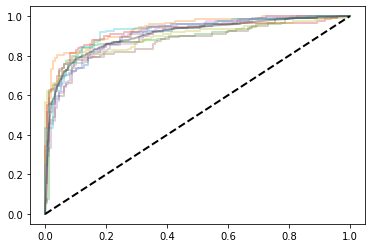

In [ ]:
accs = []
Specificity_L = []
Sensitivity_L = []
Precision_L = []
Recall_L = []
MCC_L = []
aucs = []
aucs_pr = []
tprs = []
prs = []
f1s = []
raccs = []
diff_accs = []
auc_prs = []
mean_fpr = np.linspace(0, 1, 100)
mean_recall = np.linspace(0, 1, 100)

for j, (train_index, test_index) in enumerate(kf):
    train_data = Features  
    train_features = train_data.iloc[list(train_index)]
    train_labels = train_Label.iloc[list(train_index)]
    train_fe = scaler.fit_transform(train_features)
    selector = VarianceThreshold(0.001)
    selector_VT = selector.fit(train_fe)
    Mordred_desc_VT_001 = train_features[train_features.columns[selector_VT.get_support(indices=False)]]
    Mordred_desc_VT_001.head()
    cor_matrix = Mordred_desc_VT_001 .corr().abs()
    print(cor_matrix)
    upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
    print(upper_tri)
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
    print(to_drop)
    Mordred_desc_VT_001_corr90= Mordred_desc_VT_001.drop(Mordred_desc_VT_001[to_drop],axis=1)
    Mordred_desc_VT_001_corr90.head()
    #XGB- Feature Importance 
    xgb = XGBClassifier(random_state=seed).fit(Mordred_desc_VT_001_corr90,train_labels)
    print(xgb.feature_importances_)
    selection = SelectFromModel(xgb, threshold=0.001, prefit=True)
    select_Features = selection.transform(Mordred_desc_VT_001_corr90)
    print("Final OPtimal Feature Set Shape:",select_Features.shape)

    ##########################################################
    test_features_full = train_data.iloc[list(test_index)]
    test_Fe = test_features_full.filter(Mordred_desc_VT_001_corr90.columns)
    test_Fe.head()
    select_test_features = selection.transform(test_Fe)
    print("Test Features Final set's Shape:",select_test_features.shape)
    final_Fe = scaler.fit(select_Features)
    test_features = scaler.transform(select_test_features)
    test_labels = train_Label.iloc[list(test_index)]
    
    print("test_index",j,test_index)
    modelName='5_CatBoost_Split_OCT_Mito_Tox_Total3407_Mordredvar0.001corr90_XGBFI0.001_seed42_n1000_lr0.3depth6_splitseed42'+str(j)+'_fold'        
    folder= 'Results/'
    results_folder=folder+modelName+ '/'
    filename = results_folder+ 'finalized_model.sav'
    loaded_model = pickle.load(open(filename, 'rb'))
    
    #################################################
    #Predict Probability
    y_pred_prob = loaded_model.predict_proba(test_features)
    #Predict class
    y_pred = np.argmax(y_pred_prob, axis=1)
    print(y_pred)
    y_true = test_labels
    ###############################################
    ###############################################
    #AUC-ROC
    fpr, tpr, t = roc_curve(y_true, y_pred_prob[:, 1])
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = metrics.auc(fpr, tpr)
    print("roc_auc for fold :",roc_auc)
    
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (j, roc_auc))
    
    ##############################################
    #AUC-PRC
    #average_precision = average_precision_score(y_true, y_pred)
    #print("average_precision_score",average_precision)
    pr, rc, thresholds = precision_recall_curve(y_true,y_pred_prob[:, 1])
    prs.append(np.interp(mean_recall, rc[::-1], pr[::-1])[::-1])
    auc_pr = metrics.auc(rc,pr)
    print("auc_prc for fold :",auc_pr)
    ###############################################    
    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("Confusion Matrix",cm.ravel())
    #Specificity
    Specificity = tn / (tn + fp)
    print("Specificity:",Specificity)
    #true_positive_rate:Sensitivity or recall
    Sensitivity = tp / (tp + fn)
    print("Sensitivity:",Sensitivity)
    #positive_predictive_value:Precision
    Precision = tp/ (tp + fp)
    print("Precision:",Precision)
    Recall=tp/ (tp + fn)
    print("Recall:",Recall)
    #accuracy_score(y_true, y_pred)
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    #acc = accuracy_score(y_true, y_pred)
    print("Accuracy:",accuracy)
    mcc = matthews_corrcoef(y_true, y_pred)
    print("MCC:",mcc)
    F1_score = (2*tp)/((2*tp)+fn+fp)
    print('F1_score:',F1_score)
    ##################################################
    # Update the List
    Specificity_L.append(Specificity)
    Sensitivity_L.append(Sensitivity)
    Precision_L.append(Precision)
    Recall_L.append(Recall)
    MCC_L.append(mcc)
    aucs.append(roc_auc)
    auc_prs.append(auc_pr)
    accs.append(accuracy)
    f1s.append(F1_score)
    #########################################################
    """tprs.append(np.interp(mean_fpr,fpr,tpr))
    tprs[-1][0] = 0.0
    pr, rc, thresholds = precision_recall_curve(y_true,y_pred)
    prs.append(np.interp(mean_recall, rc[::-1], pr[::-1])[::-1])
    auc_pr = metrics.auc(rc,pr)
    aucs_pr.append(auc_pr)"""
    ############################################################
    ###########################################################
      
    #@@@@@@@@@@@@@@
    #Most Probable Random Accuracy Calculation
    N = tp+tn+fp+fn
    Rand_ACC = (((tp+fn)*(tp+fp))+((tn+fp)*(tn+fn)))/(N*N)
    print("Rand_ACC:",Rand_ACC)
    raccs.append(Rand_ACC)
     #@@@@@@@@@@@@@@
    #Difference between model accuracy and random accuracy
    diff = (accuracy- Rand_ACC)*100
    print("Difference between Model Accuracy and Random Accuracy in %:",diff)
    diff_accs.append(diff)
    ###########################################################
    
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')

print(tprs)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0

plt.plot(mean_fpr, mean_tpr, lw=2, alpha=0.3, color = 'black',label='mean ROC  (AUC = %0.4f)' % ( roc_auc))
plt.show
mean_auc = auc(mean_fpr, mean_tpr)
print("mean_auc from mean fpr, mean tpr",mean_auc)
mean_auROC = np.mean(aucs)
print("mean_auROC from mean of each fold aucs",mean_auROC)
#np.save('SVM_tpr_MACCS166',mean_tpr)
#np.save('SVM_fpr_MACCS166',mean_fpr)
#mean_auc = metrics.auc(mean_fpr,mean_tpr)
#np.save('SVM_auc_MACCS166',mean_auROC)
print('SVM_auc_MACCS166',mean_auROC)
mean_precision = np.mean(prs,axis=0)
#np.save('SVM_pr_MACCS166',mean_precision)
#print("mean_precision",mean_precision)
mean_recall = mean_recall[::-1]
#np.save('SVM_rc_MACCS166',mean_recall)
print("mean_recall",mean_recall)
mean_auc_pr = metrics.auc(mean_recall,mean_precision)
#mean_auc_pr = np.mean(auc_prs)
#np.save('SVM_auc_pr_MACCS166',mean_auc_pr)
print('SVM_auc_pr_MACCS166',mean_auc_pr)
mean_F1score = np.mean(f1s,axis=0)
#np.save('SVM_F1score_MACCS166',mean_F1score)
print('SVM_F1score_MACCS166',mean_F1score)


In [ ]:
print("Specificity_L",Specificity_L)
print("Sensitivity_L",Sensitivity_L)
print("Precision_L",Precision_L)
print("Recall_L",Recall_L)
print("aucs",aucs)
print("accs:",accs)
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
print("Accuracy:%.4f (+/- %.4f)" % (np.mean(accs), np.std(accs)))
print("Specificity:%.4f (+/- %.4f)" % (np.mean(Specificity_L), np.std(Specificity_L)))
print("Sensitivity:%.4f (+/- %.4f)" % (np.mean(Sensitivity_L), np.std(Sensitivity_L)))
print("Precision:%.4f (+/- %.4f)" % (np.mean(Precision_L), np.std(Precision_L)))
print("Recall:%.4f (+/- %.4f)" % (np.mean(Recall_L), np.std(Recall_L)))
print("aucs:%.4f (+/- %.4f)" % (np.mean(aucs), np.std(aucs)))
print("MCC:%.4f (+/- %.4f)" % (np.mean(MCC_L), np.std(MCC_L)))
print("auc_prs:%.4f (+/- %.4f)" % (np.mean(auc_prs), np.std(auc_prs)))
print("F1score:%.4f (+/- %.4f)" % (np.mean(f1s), np.std(f1s)))
#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
mean_acc = (np.mean(accs))
mean_sp = (np.mean(Specificity_L))
mean_sn = (np.mean(Sensitivity_L))          
                   
mean_MCC = (np.mean(MCC_L))
print("mean_auc_prs",np.mean(auc_prs))
print("mean_acc:",mean_acc)
#np.save('6',mean_acc)
print("mean_sp:",mean_sp)
#np.save('SVM_Sp_MACCS166',mean_sp)
print("mean_sn:",mean_sn)
#np.save('SVM_Sn_MACCS166',mean_sn)
print("mean_MCC:",mean_MCC)
#np.save('SVM_MCC_MACCS166',mean_MCC)

###@@@@@@@@@@@@@@@@@@@@@@##############################
mean_RndACC = (np.mean(raccs))
print("mean_RndACC",mean_RndACC)
mean_diffacc = (np.mean(diff_accs))
print("mean_diffacc",mean_diffacc)
###@@@@@@@@@@@@@@@@@@@@@@##############################

Specificity_L [0.8543046357615894, 0.94, 0.9333333333333333, 0.9066666666666666, 0.8533333333333334, 0.9066666666666666, 0.92, 0.8666666666666667, 0.8866666666666667, 0.88]
Sensitivity_L [0.8114754098360656, 0.8048780487804879, 0.7723577235772358, 0.8130081300813008, 0.8048780487804879, 0.7622950819672131, 0.7704918032786885, 0.7704918032786885, 0.7950819672131147, 0.8442622950819673]
Precision_L [0.8181818181818182, 0.9166666666666666, 0.9047619047619048, 0.8771929824561403, 0.8181818181818182, 0.8691588785046729, 0.8867924528301887, 0.8245614035087719, 0.8508771929824561, 0.8512396694214877]
Recall_L [0.8114754098360656, 0.8048780487804879, 0.7723577235772358, 0.8130081300813008, 0.8048780487804879, 0.7622950819672131, 0.7704918032786885, 0.7704918032786885, 0.7950819672131147, 0.8442622950819673]
aucs [0.9083704266637717, 0.9383197831978319, 0.8931707317073172, 0.9195121951219513, 0.9081300813008131, 0.8716939890710382, 0.9098907103825137, 0.9020218579234972, 0.8950819672131147, 0.9